Importaciones

In [133]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re



In [134]:
df = pd.read_csv('archivo_final.csv')
df.head()  # muestra las primeras filas del DataFrame
df.describe()  # proporciona estadísticas descriptivas para las columnas numéricas
df.info()  # muestra información sobre el DataFrame, incluyendo los tipos de datos y la cantidad de valores no nulos


C:\Users\Jessica Ortiz\AppData\Local\Temp\ipykernel_17264\1091381712.py:1: DtypeWarning: Columns (16,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivo_final.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753177 entries, 0 to 753176
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DEPREG    753177 non-null  int64  
 1   MUPREG    753177 non-null  int64  
 2   MESREG    753177 non-null  int64  
 3   AÑOREG    753177 non-null  int64  
 4   CLAUNI    753177 non-null  int64  
 5   EDADHOM   753177 non-null  int64  
 6   EDADMUJ   753177 non-null  int64  
 7   GETHOM    297767 non-null  float64
 8   GETMUJ    297767 non-null  float64
 9   NACHOM    753177 non-null  int64  
 10  NACMUJ    753177 non-null  int64  
 11  OCUHOM    297767 non-null  float64
 12  OCUMUJ    297767 non-null  float64
 13  NUPHON    62104 non-null   float64
 14  NUPMUJ    62104 non-null   float64
 15  DEPOCU    753177 non-null  int64  
 16  MUPOCU    753177 non-null  object 
 17  MESOCU    753177 non-null  int64  
 18  AÑOOCU    508678 non-null  float64
 19  AREAG     297767 non-null  float64
 20  ESCH

In [135]:
from scipy import stats

# reemplazar valores faltantes
df.fillna(0, inplace=True)

# eliminar filas duplicadas
df.drop_duplicates(inplace=True)

# reemplazar los valores que contienen el formato 1-XXX por NaN en todo el dataframe
df = df.applymap(lambda x: np.nan if isinstance(x, str) and re.match('^1-', x) else x)
df = df.applymap(lambda x: np.nan if isinstance(x, str) and re.match('^13-', x) else x)

# eliminar las filas que contienen NaN en todo el dataframe
df.dropna(inplace=True)

# reemplazar todos los valores 'NEOG' por 0
df.replace('NEOG', 0, inplace=True)

# Convertir tipos de datos
df["GETHOM"] = df["GETHOM"].astype(int)
df["GETMUJ"] = df["GETMUJ"].astype(int)
df["OCUHOM"] = df["OCUHOM"].astype(int)
df["OCUMUJ"] = df["OCUMUJ"].astype(int)
df["NUPHON"] = df["NUPHON"].astype(int)
df["NUPMUJ"] = df["NUPMUJ"].astype(int)
df["MUPOCU"] = df["MUPOCU"].astype(int)
df["AÑOOCU"] = df["AÑOOCU"].astype(int)
df["AREAG"] = df["AREAG"].astype(int)
df["ESCHOM"] = df["ESCHOM"].astype(int)
df["ESCMUJ"] = df["ESCMUJ"].astype(int)
df["DIAOCU"] = df["DIAOCU"].astype(int)

# Calcular el z-score para cada valor de la columna
z_scores = stats.zscore(df['NUPHON'])
z_scores2 = stats.zscore(df['NUPMUJ'])
z_scores3 = stats.zscore(df['NUPMUJ'])

# Identificar los valores que están a más de 3 desviaciones estándar de la media
outliers = (abs(z_scores) > 3)
outliers2 = (abs(z_scores2) > 3)
outliers3 = (abs(z_scores3) > 3)

# Eliminar los valores atípicos
df = df.loc[~outliers]
df = df.loc[~outliers2]
df = df.loc[~outliers3]


# eliminar columnas irrelevantes
df.drop(['PUEHOM', 'PUEMUJ','CIUOHOM', 'CIUOMUJ', 'AREAGOCU','NUNUHO', 'NUNUMU'], axis=1, inplace=True)

In [136]:
df.to_csv('archivo_limpio.csv', index=False)


In [137]:
df = pd.read_csv('archivo_limpio.csv')
df.head()


,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,NUPHON,NUPMUJ,DEPOCU,MUPOCU,MESOCU,AÑOOCU,AREAG,ESCHOM,ESCMUJ,DIAOCU
0,13,1302,1,10,1,16,14,9,9,320,...,1,1,13,1302,12,9,9,0,0,0
1,14,1412,8,9,1,16,14,1,1,320,...,1,1,14,1412,7,9,9,0,0,0
2,14,1412,10,9,1,16,14,1,1,320,...,1,1,14,1412,10,9,9,0,0,0
3,21,2102,5,9,1,16,14,2,2,320,...,1,1,21,2102,4,9,9,0,0,0
4,12,1202,7,9,1,16,14,9,9,320,...,1,1,12,1202,6,9,9,0,0,0


In [138]:
df.tail()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718045 entries, 0 to 718044
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   DEPREG   718045 non-null  int64
 1   MUPREG   718045 non-null  int64
 2   MESREG   718045 non-null  int64
 3   AÑOREG   718045 non-null  int64
 4   CLAUNI   718045 non-null  int64
 5   EDADHOM  718045 non-null  int64
 6   EDADMUJ  718045 non-null  int64
 7   GETHOM   718045 non-null  int64
 8   GETMUJ   718045 non-null  int64
 9   NACHOM   718045 non-null  int64
 10  NACMUJ   718045 non-null  int64
 11  OCUHOM   718045 non-null  int64
 12  OCUMUJ   718045 non-null  int64
 13  NUPHON   718045 non-null  int64
 14  NUPMUJ   718045 non-null  int64
 15  DEPOCU   718045 non-null  int64
 16  MUPOCU   718045 non-null  int64
 17  MESOCU   718045 non-null  int64
 18  AÑOOCU   718045 non-null  int64
 19  AREAG    718045 non-null  int64
 20  ESCHOM   718045 non-null  int64
 21  ESCMUJ   718045 non-null  int64
 

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,NUPHON,NUPMUJ,DEPOCU,MUPOCU,MESOCU,AÑOOCU,AREAG,ESCHOM,ESCMUJ,DIAOCU
count,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,...,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000,718045.000000
mean,9.532187,960.754008,6.482173,1937.265550,3.100023,31.117912,28.363635,1.140156,1.212049,321.990665,...,0.038627,0.038491,9.544292,962.172489,6.656211,1251.998625,0.851012,2.997326,3.018879,15.412367
std,6.388962,639.474049,3.550496,384.770918,1.491131,45.191211,47.973962,2.385953,2.505738,35.622448,...,0.194811,0.193770,6.379739,638.290186,3.564550,976.687198,2.068772,2.070579,2.287036,9.001979
min,1.000000,101.000000,1.000000,9.000000,1.000000,12.000000,10.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,1.000000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,401.000000,3.000000,2012.000000,3.000000,22.000000,20.000000,0.000000,0.000000,320.000000,...,0.000000,0.000000,4.000000,401.000000,3.000000,0.000000,0.000000,2.000000,1.000000,8.000000
50%,10.000000,1002.000000,6.000000,2014.000000,3.000000,26.000000,23.000000,0.000000,0.000000,320.000000,...,0.000000,0.000000,10.000000,1002.000000,7.000000,2011.000000,0.000000,2.000000,2.000000,16.000000
75%,14.000000,1414.000000,10.000000,2016.000000,3.000000,32.000000,29.000000,1.000000,1.000000,320.000000,...,0.000000,0.000000,14.000000,1414.000000,10.000000,2016.000000,1.000000,4.000000,4.000000,23.000000
max,22.000000,2217.000000,12.000000,2019.000000,9.000000,999.000000,999.000000,9.000000,9.000000,9999.000000,...,6.000000,6.000000,22.000000,2217.000000,12.000000,2018.000000,9.000000,9.000000,9.000000,31.000000


## Cantidad de matrimonios por mes

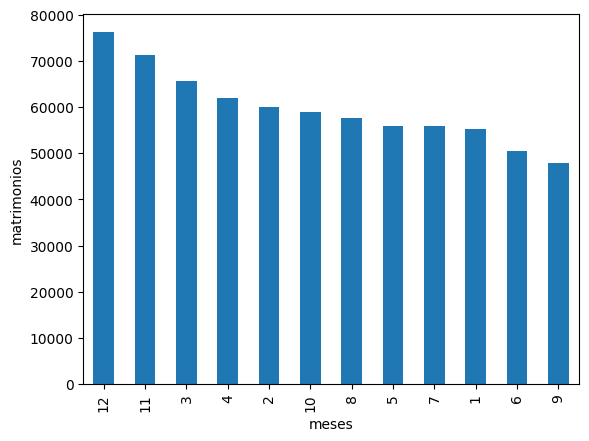

In [139]:
df['MESOCU'].value_counts().plot(kind='bar')
plt.xlabel('meses')
plt.ylabel('matrimonios')
plt.show()



## Cantidad de matrimonios por departamento

In [140]:
df['DEPOCU'].value_counts()

1     146550
13     55563
16     50561
12     48886
14     46039
9      43105
4      35737
5      34251
10     32090
8      26048
22     23449
17     21535
3      20465
7      19953
11     17808
6      17365
20     16059
18     15645
15     13688
21     13658
19     11503
2       8087
Name: DEPOCU, dtype: int64

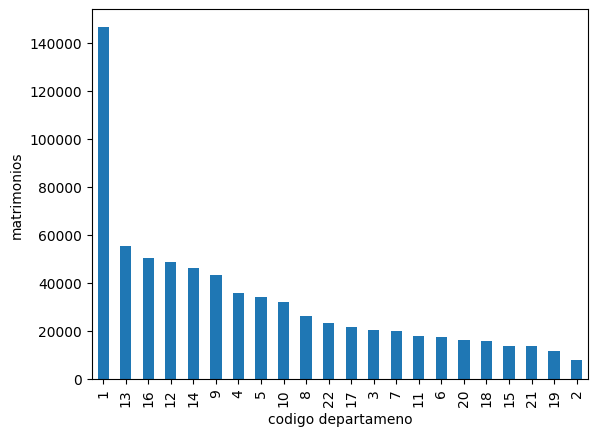

In [141]:
df['DEPOCU'].value_counts().plot(kind='bar')
plt.xlabel('codigo departameno')
plt.ylabel('matrimonios')
plt.show()


In [142]:
# Reemplazar los valores numéricos por etiquetas
df['CLAUNI'] = df['CLAUNI'].replace({1: 'Comunidad absoluta',
                                     2: 'Separación absoluta',
                                     3: 'Comunidad de gananciales',
                                     9: 'No especificado'})


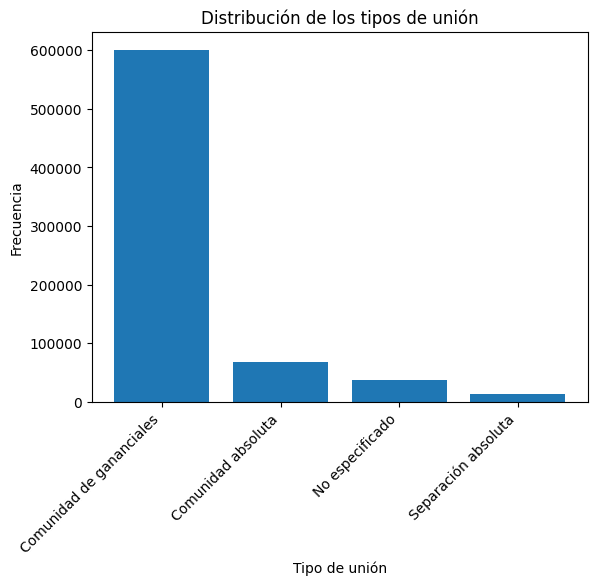

In [143]:
counts = df['CLAUNI'].value_counts()

# Crear un gráfico de barras
plt.bar(counts.index, counts.values)

# Rotar los nombres de las etiquetas
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas y título
plt.xlabel('Tipo de unión')
plt.ylabel('Frecuencia')
plt.title('Distribución de los tipos de unión')


# Mostrar la gráfica
plt.show()

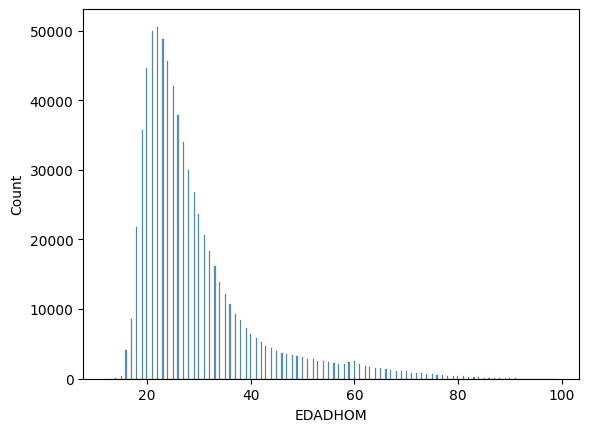

In [144]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADHOM'] != 999, 'EDADHOM']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()


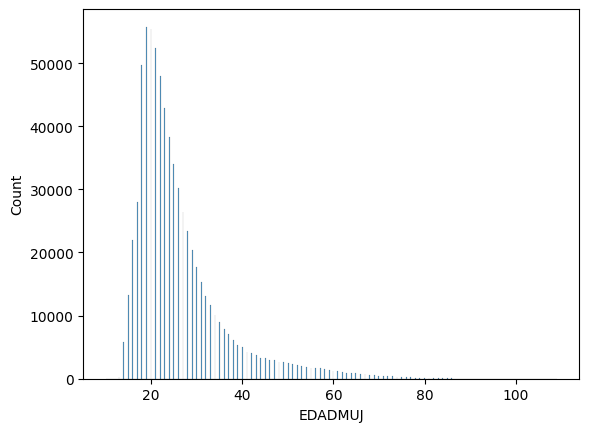

In [145]:

# Filtrar los valores que no son iguales a 999
edad_sin_999 = df.loc[df['EDADMUJ'] != 999, 'EDADMUJ']

# Crear una gráfica de distribución de la columna "edad" sin los valores de 999
sns.histplot(edad_sin_999)

# Mostrar la gráfica
plt.show()

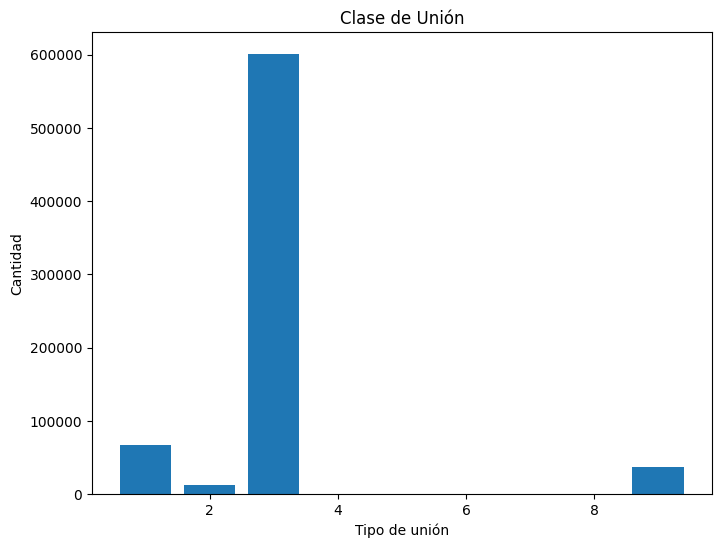

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('archivo_limpio.csv')

plt.figure(figsize=(8,6))
plt.bar(df['CLAUNI'].value_counts().index, df['CLAUNI'].value_counts().values)
plt.title('Clase de Unión')
plt.xlabel('Tipo de unión')
plt.ylabel('Cantidad')
plt.show()


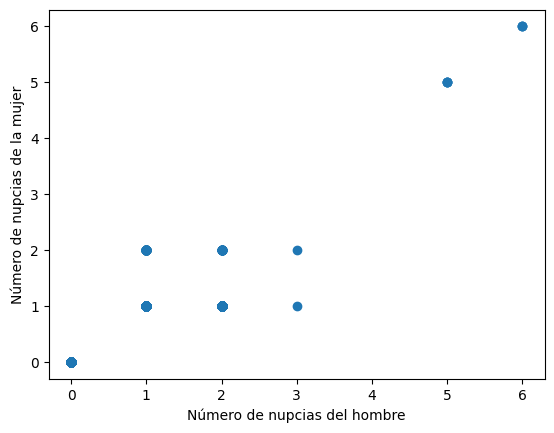

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('archivo_limpio.csv')

# Eliminar registros donde NUPHOM y/o NUPMUJ son 9 (ignorados)
df = df[(df.NUPHON != 9) & (df.NUPMUJ != 9)]

# Crear scatter plot
plt.scatter(df.NUPHON, df.NUPMUJ)
plt.xlabel('Número de nupcias del hombre')
plt.ylabel('Número de nupcias de la mujer')
plt.show()



## Clustering y análisis exploratorio

In [148]:
# Importar librerías adicionales
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('archivo_final.csv')

# Filtrar el dataframe usando solo las columnas de interés
df_filtered = df[['NUPHON', 'NUPMUJ', 'AÑOREG', 'CLAUNI']]

# Imputar valores faltantes utilizando la media solo para columnas numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_filtered[['NUPHON', 'NUPMUJ', 'AÑOREG']] = imputer.fit_transform(df_filtered[['NUPHON', 'NUPMUJ', 'AÑOREG']])

# Reemplazar la variable categórica 'CLAUNI' con números
le = LabelEncoder()
df_filtered['CLAUNI_numeric'] = le.fit_transform(df_filtered['CLAUNI'])

# Eliminar la columna 'CLAUNI' original ya que se ha reemplazado por 'CLAUNI_numeric'
df_filtered.drop(['CLAUNI'], axis=1, inplace=True)

# Preparar los datos para el clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

# Reducir la dimensionalidad de los datos usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

def find_optimal_clusters(data, max_clusters):
    iters = range(2, max_clusters+1)
    s_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        s_scores.append(silhouette_score(data, kmeans.labels_))

    plt.plot(iters, s_scores)
    plt.xlabel('Número de Clusters')
    plt.ylabel('Coeficiente de Silueta')
    plt.show()

# Encontrar el número óptimo de clusters
find_optimal_clusters(reduced_data, 5)

# Hacer el agrupamiento con KMeans
# Utilizar el número de clusters óptimo encontrado (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reduced_data)

# Verificar la calidad del agrupamiento usando el método de la silueta
silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)
print("Coeficiente de silueta promedio:", silhouette_avg)

# Agregar la etiqueta del cluster al dataframe
df_filtered['cluster'] = kmeans.labels_

# Interpreta los grupos, usando para eso las variables numéricas y categóricas dentro de cada grupo
cluster_summary = df_filtered.groupby('cluster').mean()
print(cluster_summary)

# Graficar las variables categóricas en función de los clusters
sns.countplot(data=df_filtered, x='CLAUNI_numeric', hue='cluster')
plt.show()

# Graficar las variables numéricas en función de los clusters
sns.scatterplot(data=df_filtered, x='NUPHON', y='NUPMUJ', hue='cluster')
plt.show()


C:\Users\Jessica Ortiz\AppData\Local\Temp\ipykernel_17264\3574961877.py:13: DtypeWarning: Columns (16,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivo_final.csv')
C:\Users\Jessica Ortiz\AppData\Local\Temp\ipykernel_17264\3574961877.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['NUPHON', 'NUPMUJ', 'AÑOREG']] = imputer.fit_transform(df_filtered[['NUPHON', 'NUPMUJ', 'AÑOREG']])
C:\Users\Jessica Ortiz\AppData\Local\Temp\ipykernel_17264\3574961877.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

KeyboardInterrupt: 